In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
uber = pd.read_csv('../uber_data.csv',parse_dates=["pickup_dt"])

In [3]:
uber.head()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y


In [4]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   pickup_dt  29101 non-null  datetime64[ns]
 1   borough    26058 non-null  object        
 2   pickups    29101 non-null  int64         
 3   spd        29101 non-null  float64       
 4   vsb        29101 non-null  float64       
 5   temp       29101 non-null  float64       
 6   dewp       29101 non-null  float64       
 7   slp        29101 non-null  float64       
 8   pcp01      29101 non-null  float64       
 9   pcp06      29101 non-null  float64       
 10  pcp24      29101 non-null  float64       
 11  sd         29101 non-null  float64       
 12  hday       29101 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 2.9+ MB


In [5]:
#fonction pour plot directement en fonction du mois ou du jour voulu 

def plot_analysis(df, month = -1, day = -1):
    '''permet de plot rapidement en fonction des mois ou des jours
    params : dataframe, le mois et le jour à plot, si pas de jours plot le mois entier
    return : le plot
    '''
    df = df.set_index('pickup_dt')
    
    if month == -1 and day == -1:
        grouped = df.groupby('borough')
        return grouped['pickups'].plot(legend = True, figsize=(15, 10))
    
    if month != -1 and day == -1:
        by_month = df.loc[df.index.month == month]
        grouped_month = by_month.groupby('borough')
        return grouped_month['pickups'].plot(legend = True, figsize = (15,10))
        
    if month != -1 and day != -1:
        by_day = df.loc[df.index.month == month]
        by_day = by_day.loc[by_day.index.day == day]
        grouped_day = by_day.groupby('borough')
        return grouped_day['pickups'].plot(legend = True, figsize = (15,10))

## Plotting du nombre de pickups en fonction du temps, groupé par quartier de NYC

borough
Bronx            AxesSubplot(0.125,0.125;0.775x0.755)
Brooklyn         AxesSubplot(0.125,0.125;0.775x0.755)
EWR              AxesSubplot(0.125,0.125;0.775x0.755)
Manhattan        AxesSubplot(0.125,0.125;0.775x0.755)
Queens           AxesSubplot(0.125,0.125;0.775x0.755)
Staten Island    AxesSubplot(0.125,0.125;0.775x0.755)
Name: pickups, dtype: object

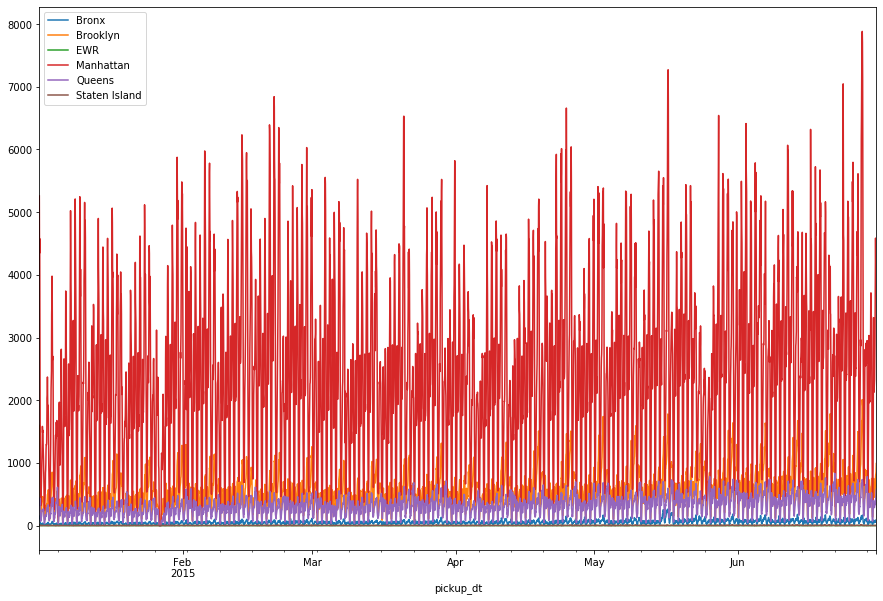

In [6]:
plot_analysis(uber)

borough
Bronx            AxesSubplot(0.125,0.125;0.775x0.755)
Brooklyn         AxesSubplot(0.125,0.125;0.775x0.755)
EWR              AxesSubplot(0.125,0.125;0.775x0.755)
Manhattan        AxesSubplot(0.125,0.125;0.775x0.755)
Queens           AxesSubplot(0.125,0.125;0.775x0.755)
Staten Island    AxesSubplot(0.125,0.125;0.775x0.755)
Name: pickups, dtype: object

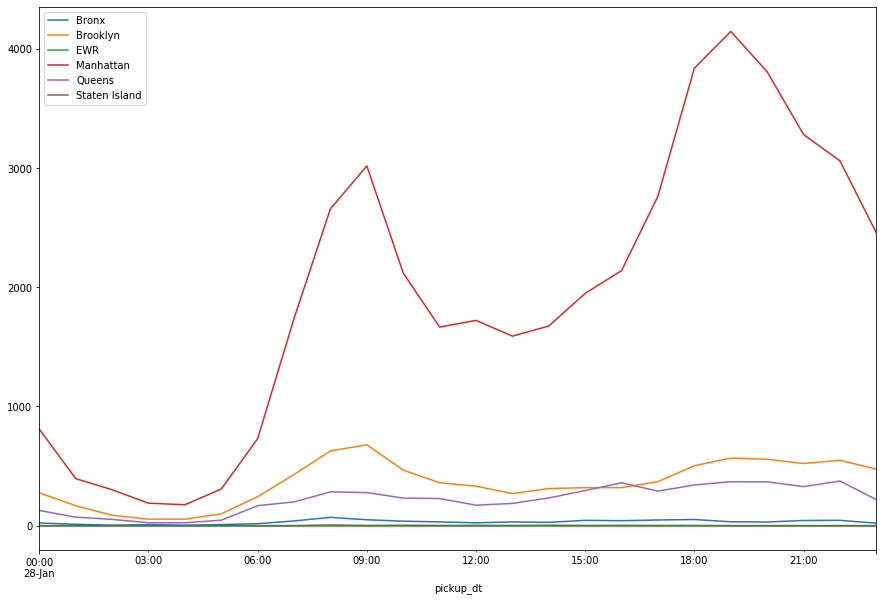

In [20]:
plot_analysis(uber, month = 1, day = 25)

In [8]:
uber_day = uber.set_index('pickup_dt')
uber_day['weekday'] = uber_day.index.dayofweek
uber_day = uber_day[uber_day['borough'] == 'Manhattan']

In [9]:
uber_day['weekend'] = ((pd.DatetimeIndex(uber_day.index).dayofweek) // 5 == 1).astype(int)

Affichage de la courbe sur le week end

weekend
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: pickups, dtype: object

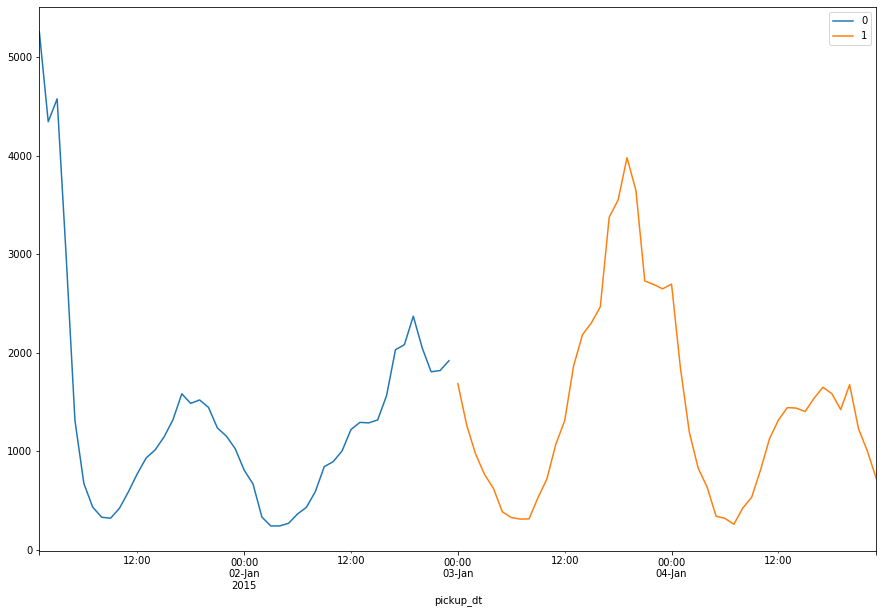

In [10]:
weekend_grouped = uber_day.loc[uber_day.index.week == 1]
weekend_grouped = weekend_grouped.groupby('weekend')
weekend_grouped['pickups'].plot(legend = True, figsize=(15, 10))


Il semblerait que certain quartier n'est que très peu ou pas du tout de course

In [11]:
EWR_analysis = uber[uber['borough'] == 'EWR']

In [12]:
EWR_analysis = uber[uber['borough'] == 'EWR']
print(f"EWR max : {EWR_analysis['pickups'].max()}")
print(f"EWR min : {EWR_analysis['pickups'].min()}")
print(f"EWR mean : {EWR_analysis['pickups'].mean()}")

EWR max : 2
EWR min : 0
EWR mean : 0.02417683628827999


In [13]:
staten_island_analysis = uber[uber['borough'] == 'Staten Island']
print(f"EWR max : {staten_island_analysis['pickups'].max()}")
print(f"EWR min : {staten_island_analysis['pickups'].min()}")
print(f"EWR mean : {staten_island_analysis['pickups'].mean()}")

EWR max : 13
EWR min : 0
EWR mean : 1.6018880957863229


In [14]:
bronx_analysis = uber[uber['borough'] == 'Bronx']
print(f"EWR max : {bronx_analysis['pickups'].max()}")
print(f"EWR min : {bronx_analysis['pickups'].min()}")
print(f"EWR mean : {bronx_analysis['pickups'].mean()}")

EWR max : 262
EWR min : 0
EWR mean : 50.66705042597283


In [15]:
na = uber[uber['borough'].isna() == True]
print(f"EWR max : {na['pickups'].max()}")
print(f"EWR min : {na['pickups'].min()}")
print(f"EWR mean : {na['pickups'].mean()}")

EWR max : 11
EWR min : 1
EWR mean : 2.0571804140650674


# Nous pouvons de ne pas traiter le quartier EWR et staten island étant donné leur faible nombre de courses

De même on peut voir que la moyenne sur les valeurs manquantes est faible on peut donc supprimer sans pertes drastiques de données, les données manquantes